### Respond Time Calculation-Plots

In [2]:
#Check number of fires that have been missed

In [3]:
# ideal duration of responding time should be 5 min 50 seconds.
# so creating varous time thresholds like 4 mins, 6 min, 8 mins, 10 mins, 12 mins, 15 mins, 20 mins
# to check no. of fires that will responded in time based on current firestations in texas
# year wise number of fires being missed

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.cluster import KMeans
#from sklearn.cluster import BisectingKmeans
from collections import Counter

In [5]:
import sklearn



from platform import python_version

print(python_version())

3.8.8


In [6]:
firestations_df=pd.read_csv("firestations_f.csv")

In [7]:
firestations_df

,FireDepartmentId,Name,TypeId,County,PhysicalCity,PhysicalState,PhysicalZipCode,PhysicalAddress1,PhysicalAddress2,Latitude,...,CharterId,CharterType,Legacy_VFDId,TESRS,IsAssistanceOnHold,EstablishmentYear,PrimaryProtectionAreaSqMile,CreatedDate,LastVerifiedDate,LastVerifiedBy
0,711,2604 VFD,VFD,Hill,Whitney,TX,76692,319 FM 2604,NaN,32.010900,...,41347601.0,Department,2510.0,NaN,0.0,1977.0,42.0,8/14/2017 15:09,12/7/2020 16:48,4328.0
1,1696,287 R/C Fire & Rescue,Combination/Part Paid,Navarro,Corsicana,TX,75109,9854 S Hwy 287,NaN,31.997800,...,800321607.0,Department,4177.0,NaN,0.0,2004.0,90.0,2/2/2018 16:31,9/6/2022 9:37,7936.0
2,246,356 VFD,VFD,Trinity,Trinity,TX,75862,12427 FM 356,NaN,30.870400,...,64714301.0,Department,985.0,NaN,0.0,1989.0,60.0,3/15/2018 15:35,5/4/2022 16:19,145.0
3,1032,84 East VFD,Combination/Part Paid,Anderson,Palestine,TX,75801,2254 ACR 385,NaN,31.746636,...,58085601.0,Department,2960.0,NaN,0.0,1982.0,95.0,4/6/2018 13:19,11/12/2020 9:56,829.0
4,1644,980 North VFD,Combination/Part Paid,San Jacinto,Huntsville,TX,77320,30 Lakeside Drive,NaN,30.860360,...,117550401.0,Department,4004.0,NaN,0.0,1990.0,17.0,5/4/2016 12:16,3/1/2021 14:40,281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,69,Yorktown VFD,VFD,DeWitt,Yorktown,TX,78164,107 W. Main,NaN,28.979400,...,0.0,City,283.0,103.0,0.0,NaN,176.0,12/13/2017 17:33,2/22/2022 19:32,7758.0
1836,1805,Ysleta del Sur Pueblo Fire Department,Combination/Part Paid,El Paso,El Paso,TX,79927,1100 Santos Sanchez suite B,NaN,31.687554,...,NaN,NaN,4541.0,NaN,1.0,NaN,NaN,5/28/2014 16:20,1/5/2021 16:14,6554.0
1837,623,Zapata County Fire Department,Combination/Part Paid,Zapata,Zapata,TX,78076,305 FM 496 E,NaN,26.905600,...,0.0,County,2374.0,NaN,0.0,NaN,1059.0,9/19/2014 15:34,7/3/2022 15:38,439.0
1838,1453,Zavalla VFD,VFD,Angelina,Zavalla,TX,75980,174 park Street,NaN,31.158442,...,4032301.0,Department,3546.0,NaN,0.0,1977.0,180.0,8/3/2015 12:18,12/2/2020 11:34,281.0


In [9]:
fire_df=pd.read_csv("fire_data.csv")

<ipython-input-9-6590a2e7a007>:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  fire_df=pd.read_csv("fire_data.csv")


In [10]:
fire_df=fire_df[fire_df["STATE"]=="TX"]

In [11]:
fire_df

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
283,283,284,289,FS-1419493,FED,FS-FIRESTAT,FS,USTXTXF,National Forests And Grasslands In Texas,813,...,B,33.786111,-96.150000,5.0,USFS,TX,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x98\x99\x99\x99\x99...
284,284,285,290,FS-1419494,FED,FS-FIRESTAT,FS,USTXTXF,National Forests And Grasslands In Texas,813,...,C,31.312500,-94.270833,13.0,STATE OR PRIVATE,TX,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x10\xc1QUU\x91W\xc0...
285,285,286,291,FS-1419497,FED,FS-FIRESTAT,FS,USTXTXF,National Forests And Grasslands In Texas,813,...,B,33.345833,-97.595833,5.0,USFS,TX,NaN,NaN,NaN,"b'\x00\x01\xad\x10\x00\x00\xdc\x8d\x1e""""fX\xc0..."
286,286,287,292,FS-1419498,FED,FS-FIRESTAT,FS,USTXTXF,National Forests And Grasslands In Texas,813,...,B,31.386667,-95.150556,5.0,USFS,TX,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x94\x9b\xc9\xb3\xa2...
287,287,288,293,FS-1419500,FED,FS-FIRESTAT,FS,USTXTXF,National Forests And Grasslands In Texas,813,...,C,31.354167,-95.085278,5.0,USFS,TX,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x008\x0b\xef0u\xc5W\xc0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856360,1856360,1856361,300289501,SFO-2015TXTXS3689,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXTXS,...,C,31.031333,-97.618000,14.0,MISSING/NOT SPECIFIED,TX,Bell,27.0,Bell,b'\x00\x01\xad\x10\x00\x00`;\xdfO\x8dgX\xc0\x0...
1856399,1856399,1856400,300289541,SFO-2015TXTXS3723,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXTXS,...,B,32.846100,-94.967600,14.0,MISSING/NOT SPECIFIED,TX,Upshur,459.0,Upshur,b'\x00\x01\xad\x10\x00\x00\x00\xe7\x8c(\xed\xb...
1856439,1856439,1856440,300289582,SFO-2015TXTXS3737,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXTXS,...,A,33.164283,-96.252667,14.0,MISSING/NOT SPECIFIED,TX,Hunt,231.0,Hunt,b'\x00\x01\xad\x10\x00\x00\x18\x1c\xd3\xb0+\x1...
1859961,1859961,1859962,300293785,ICS209_2015_2714938,INTERAGCY,IA-ICS209,ST/C&L,USOKECU,East Central Area Dispatch Office,OKECU,...,D,33.054000,-94.708667,14.0,MISSING/NOT SPECIFIED,TX,Morris County,343.0,Morris,b'\x00\x01\xad\x10\x00\x00\xe8\x10\x93\xcbZ\xa...


In [12]:
from scipy.spatial import distance
coords=[(fire_df["LATITUDE"][i],fire_df["LONGITUDE"][i]) for i,v in fire_df.iterrows()]
coords2=[(firestations_df["Latitude"][i],firestations_df["Longitude"][i]) for i,v in firestations_df.iterrows()]

DIST=distance.cdist(coords, coords2, 'euclidean')

In [13]:
DIST=DIST*111

In [14]:
#to find the closest firestation
min_dist=[]
for i in range(len(DIST)):
    min_dist.append((np.min(DIST[i]),firestations_df["FireDepartmentId"][np.where(DIST[i]==np.min(DIST[i]))[0][0]]))

In [15]:
min_dist[0:5]

[(13.829405832849108, 508),
 (0.6602794173192847, 152),
 (10.945492917675482, 1240),
 (1.6272718412286638, 1911),
 (6.400193250052316, 126)]

In [16]:
fire_df.columns

Index(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [17]:
# attaching closest fire stations to the fire database along with distance
fire_df2=fire_df[["FOD_ID","FIRE_YEAR","DISCOVERY_DATE","DISCOVERY_DOY","DISCOVERY_TIME","STAT_CAUSE_CODE","STAT_CAUSE_DESCR",
                 "CONT_DATE","CONT_DOY","CONT_TIME","FIRE_SIZE","FIRE_SIZE_CLASS","LATITUDE","LONGITUDE","STATE"]]

In [18]:
fire_df2["closest_firestation"]=""
fire_df2["closest_distance"]=""

<ipython-input-18-3225d82343f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_df2["closest_firestation"]=""
<ipython-input-18-3225d82343f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_df2["closest_distance"]=""


In [19]:
fire_df2=fire_df2.reset_index()

In [20]:
min_distance=[]
closest_fs=[]
for i in range(len(min_dist)):
    min_distance.append(min_dist[i][0])
    closest_fs.append(min_dist[i][1])

In [21]:
fire_df2["closest_firestation"]=closest_fs
fire_df2["closest_distance"]=min_distance

In [22]:
fire_df2

,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,closest_firestation,closest_distance
0,283,289,2005,2453394.5,24,1000.0,7.0,Arson,2453394.5,24.0,1500.0,3.00,B,33.786111,-96.150000,TX,508,13.829406
1,284,290,2005,2453395.5,25,1830.0,5.0,Debris Burning,2453395.5,25.0,2222.0,55.00,C,31.312500,-94.270833,TX,152,0.660279
2,285,291,2005,2453441.5,71,215.0,4.0,Campfire,2453442.5,72.0,1800.0,2.00,B,33.345833,-97.595833,TX,1240,10.945493
3,286,292,2005,2453463.5,93,1730.0,3.0,Smoking,2453463.5,93.0,1840.0,0.30,B,31.386667,-95.150556,TX,1911,1.627272
4,287,293,2005,2453467.5,97,1800.0,1.0,Lightning,2453468.5,98.0,1550.0,55.00,C,31.354167,-95.085278,TX,126,6.400193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142016,1856360,300289501,2015,2457314.5,292,NaN,13.0,Missing/Undefined,2457314.5,292.0,1820.0,49.70,C,31.031333,-97.618000,TX,1766,5.323015
142017,1856399,300289541,2015,2457316.5,294,1948.0,13.0,Missing/Undefined,2457316.5,294.0,2217.0,1.00,B,32.846100,-94.967600,TX,950,4.731880
142018,1856439,300289582,2015,2457323.5,301,1150.0,13.0,Missing/Undefined,2457323.5,301.0,1255.0,0.25,A,33.164283,-96.252667,TX,667,6.970155
142019,1859961,300293785,2015,2457062.5,40,1645.0,13.0,Missing/Undefined,NaN,NaN,NaN,250.00,D,33.054000,-94.708667,TX,1359,3.626507


In [23]:
fire_df2k1=fire_df2.copy(deep=True)
fire_df2k2=fire_df2.copy(deep=True)
fire_df2k3=fire_df2.copy(deep=True)

In [24]:
# Travel Time equation
#https://www.mtas.tennessee.edu/reference/estimating-travel-time-fire-apparatus
# T=0.65+D(miles)*k
# where k factor varies depending on speed. from source for 55 mph almost 90 kmh k value is 1.1

In [25]:
t=[]
for i in range(len(fire_df2)):
    t.append((0.65+0.621371*fire_df2["closest_distance"][i]*1.1)*60)

In [26]:
fire_df2["time_cal"]=t


In [27]:
fire_df2["<4_min"]=""
fire_df2["<6_min"]=""
fire_df2["<8_min"]=""
fire_df2["<10_min"]=""
fire_df2["<12_min"]=""
fire_df2["<15_min"]=""
fire_df2["<20_min"]=""

In [28]:
fire_df2

,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,...,closest_firestation,closest_distance,time_cal,<4_min,<6_min,<8_min,<10_min,<12_min,<15_min,<20_min
0,283,289,2005,2453394.5,24,1000.0,7.0,Arson,2453394.5,24.0,...,508,13.829406,606.150654,,,,,,,
1,284,290,2005,2453395.5,25,1830.0,5.0,Debris Burning,2453395.5,25.0,...,152,0.660279,66.078380,,,,,,,
2,285,291,2005,2453441.5,71,215.0,4.0,Campfire,2453442.5,72.0,...,1240,10.945493,487.879984,,,,,,,
3,286,292,2005,2453463.5,93,1730.0,3.0,Smoking,2453463.5,93.0,...,1911,1.627272,105.735209,,,,,,,
4,287,293,2005,2453467.5,97,1800.0,1.0,Lightning,2453468.5,98.0,...,126,6.400193,301.475036,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142016,1856360,300289501,2015,2457314.5,292,NaN,13.0,Missing/Undefined,2457314.5,292.0,...,1766,5.323015,257.299443,,,,,,,
142017,1856399,300289541,2015,2457316.5,294,1948.0,13.0,Missing/Undefined,2457316.5,294.0,...,950,4.731880,233.056706,,,,,,,
142018,1856439,300289582,2015,2457323.5,301,1150.0,13.0,Missing/Undefined,2457323.5,301.0,...,667,6.970155,324.849448,,,,,,,
142019,1859961,300293785,2015,2457062.5,40,1645.0,13.0,Missing/Undefined,NaN,NaN,...,1359,3.626507,187.724795,,,,,,,


In [29]:
fire_df2['<4_min'] = np.where(fire_df2['time_cal']<=240, 1, 0)
fire_df2['<6_min'] = np.where(fire_df2['time_cal']<=360, 1, 0)
fire_df2['<8_min'] = np.where(fire_df2['time_cal']<=480, 1, 0)
fire_df2['<10_min'] = np.where(fire_df2['time_cal']<=600, 1, 0)
fire_df2['<12_min'] = np.where(fire_df2['time_cal']<=720, 1, 0)
fire_df2['<15_min'] = np.where(fire_df2['time_cal']<=900, 1, 0)
fire_df2['<20_min'] = np.where(fire_df2['time_cal']<=12000, 1, 0)

In [30]:
fire_df2

,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,...,closest_firestation,closest_distance,time_cal,<4_min,<6_min,<8_min,<10_min,<12_min,<15_min,<20_min
0,283,289,2005,2453394.5,24,1000.0,7.0,Arson,2453394.5,24.0,...,508,13.829406,606.150654,0,0,0,0,1,1,1
1,284,290,2005,2453395.5,25,1830.0,5.0,Debris Burning,2453395.5,25.0,...,152,0.660279,66.078380,1,1,1,1,1,1,1
2,285,291,2005,2453441.5,71,215.0,4.0,Campfire,2453442.5,72.0,...,1240,10.945493,487.879984,0,0,0,1,1,1,1
3,286,292,2005,2453463.5,93,1730.0,3.0,Smoking,2453463.5,93.0,...,1911,1.627272,105.735209,1,1,1,1,1,1,1
4,287,293,2005,2453467.5,97,1800.0,1.0,Lightning,2453468.5,98.0,...,126,6.400193,301.475036,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142016,1856360,300289501,2015,2457314.5,292,NaN,13.0,Missing/Undefined,2457314.5,292.0,...,1766,5.323015,257.299443,0,1,1,1,1,1,1
142017,1856399,300289541,2015,2457316.5,294,1948.0,13.0,Missing/Undefined,2457316.5,294.0,...,950,4.731880,233.056706,1,1,1,1,1,1,1
142018,1856439,300289582,2015,2457323.5,301,1150.0,13.0,Missing/Undefined,2457323.5,301.0,...,667,6.970155,324.849448,0,1,1,1,1,1,1
142019,1859961,300293785,2015,2457062.5,40,1645.0,13.0,Missing/Undefined,NaN,NaN,...,1359,3.626507,187.724795,1,1,1,1,1,1,1


In [31]:
np.sum(fire_df2["<8_min"])

119997

In [32]:
fire_df2.to_csv("fire_exceedlimit.csv")

In [30]:
##################################
# Need to add a plot of number of fires occuring in each year count
##################################

##################################
# need to add a plot for for number of fires considering the acres burnt 
# (instead of normal count have to add weight factor of acres to it  ) each year
##################################

##################################
# plot to show number of firesstations reached in which rspond time
##################################

##################################
# plot to show number of fires reached in which respond time as per fire_class
##################################

##################################
# Represent top responders firestations
##################################

# firestations average responding time compoarison across the methods

### CLUSTERING SECTION

In [31]:
# Idea and logic behind is that the major fires already happened in past 20-30 years are most likely to be
# repeated at that sites because of human factor, forest or industry environment.   
# so 2 approaches optimization and clustering.
# clustering 3 methods implemeted - DBSCAN, K-MEANS, Hieraricheral Clustering
# 3 approaches - 1) entire forest stations relocated
#                2) create new firesations sites for those fires not responded in time
#                3) Grid wise approach

##### Approach1

###### K-means

In [32]:
from sklearn.cluster import KMeans
from collections import Counter

In [33]:
X=fire_df2.loc[:,['LATITUDE','LONGITUDE']]

In [34]:
X

,LATITUDE,LONGITUDE
0,33.786111,-96.150000
1,31.312500,-94.270833
2,33.345833,-97.595833
3,31.386667,-95.150556
4,31.354167,-95.085278
...,...,...
142016,31.031333,-97.618000
142017,32.846100,-94.967600
142018,33.164283,-96.252667
142019,33.054000,-94.708667


In [35]:
kmeans = KMeans(n_clusters=1840, random_state=0).fit(X)

In [36]:
# clusters Labels
fire_df2k1["cluster2"]=kmeans.labels_

In [37]:
a=kmeans.cluster_centers_

In [38]:
fs_kmeans=pd.DataFrame(a)
fs_kmeans.rename(columns={"0":"Latitude","1":"Longitude"},inplace=True)
fs_kmeans.set_axis(["Latitude","Longitude"],axis='columns',inplace=True)

<ipython-input-38-73f5885d5d44>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  fs_kmeans.set_axis(["Latitude","Longitude"],axis='columns',inplace=True)


In [39]:
fs_kmeans

,Latitude,Longitude
0,30.743584,-97.777869
1,32.422093,-94.184887
2,33.929727,-102.388788
3,32.778012,-96.775764
4,28.230327,-97.654143
...,...,...
1835,29.901883,-98.684004
1836,30.269045,-95.342342
1837,31.225566,-97.302104
1838,29.181355,-95.874386


C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


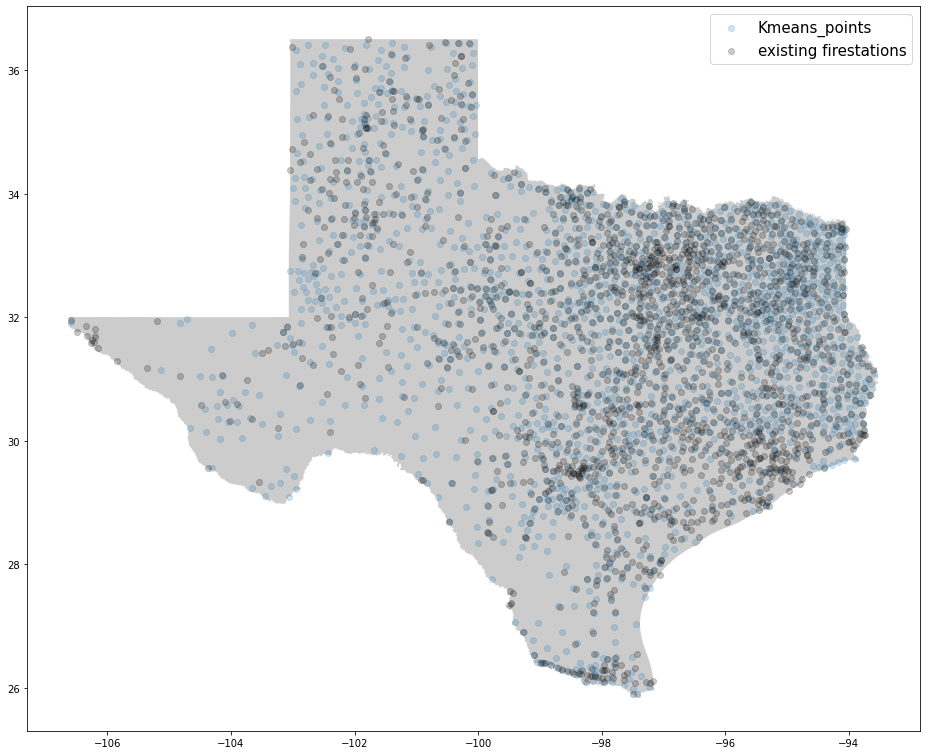

In [40]:
crs = {'init': 'epsg:4326'}
texas = gpd.read_file("Texas_State_Boundary/State.shp")
geometry = [Point(xy) for xy in zip(fs_kmeans["Longitude"],fs_kmeans["Latitude"])]
geo_df = gpd.GeoDataFrame(fs_kmeans,crs=crs,geometry = geometry)
geometry2 = [Point(xy) for xy in zip(firestations_df["Longitude"],firestations_df["Latitude"])]
geo_df2 = gpd.GeoDataFrame(firestations_df,crs=crs,geometry = geometry2)
fig, ax = plt.subplots(figsize = (16,16))
texas.plot(ax=ax, alpha = 0.4, color='grey')
geo_df.plot(ax=ax,aspect=1, alpha=0.2,label="Kmeans_points")
geo_df2.plot(ax=ax,aspect=1, alpha=0.2,color="black",label="existing firestations")
plt.legend(prop={'size':15},)


In [41]:
# check for imrovement

In [42]:
from scipy.spatial import distance
coords=[(fire_df2k1["LATITUDE"][i],fire_df2k1["LONGITUDE"][i]) for i,v in fire_df2k1.iterrows()]
coords2=[(fs_kmeans["Latitude"][i],fs_kmeans["Longitude"][i]) for i,v in fs_kmeans.iterrows()]

DIST_kmeans=distance.cdist(coords, coords2, 'euclidean')

In [43]:
DIST_kmeans=DIST_kmeans*111

In [44]:
min_distk1=[]
for i in range(len(DIST_kmeans)):
    min_distk1.append((np.min(DIST_kmeans[i]),firestations_df["FireDepartmentId"][np.where(DIST_kmeans[i]==np.min(DIST_kmeans[i]))[0][0]]))

In [52]:
min_distk1

[(9.752020422874887, 1588),
 (6.273761119025285, 1706),
 (4.142054799149296, 1907),
 (7.80405304055951, 1278),
 (9.215119916532311, 506),
 (7.037044780837356, 847),
 (7.31164368719905, 847),
 (7.303585706693707, 847),
 (5.739539226292602, 847),
 (7.560370229367481, 847),
 (7.610042247775528, 847),
 (6.370505315506526, 506),
 (8.228176528273082, 31),
 (10.49020688701991, 31),
 (3.96884034598203, 560),
 (6.349427156772436, 560),
 (5.591962479885731, 22),
 (6.3625318140988085, 1278),
 (6.370505315506526, 506),
 (5.16337759465012, 668),
 (7.090820044641794, 1353),
 (1.6020259371598105, 1816),
 (5.168728198113978, 1390),
 (1.6494789936664205, 1390),
 (2.735167173155433, 406),
 (4.774570748654764, 668),
 (5.361322004967367, 506),
 (5.089193204156276, 668),
 (4.5097592858471645, 1816),
 (3.941701877632434, 1215),
 (6.946145703268078, 1706),
 (4.897028417348808, 345),
 (0.61636292925378, 1324),
 (7.620862883390654, 1706),
 (7.620862883390654, 1706),
 (2.1116179243061834, 1384),
 (8.85965976300

In [45]:
min_distancek1=[]
closest_fsk1=[]
for i in range(len(min_distk1)):
    min_distancek1.append(min_distk1[i][0])
    closest_fsk1.append(min_distk1[i][1])

In [70]:
fire_df2k1["closest_firestation"]=closest_fsk1
fire_df2k1["closest_distance"]=min_distancek1

In [71]:
t=[]
for i in range(len(fire_df2)):
    t.append((0.65+0.621371*fire_df2k1["closest_distance"][i]*1.1)*60)
fire_df2k1["time_cal"]=t

In [72]:
fire_df2k1["<4_min"]=""
fire_df2k1["<6_min"]=""
fire_df2k1["<8_min"]=""
fire_df2k1["<10_min"]=""
fire_df2k1["<12_min"]=""
fire_df2k1["<15_min"]=""
fire_df2k1["<20_min"]=""

In [73]:
fire_df2k1['<4_min'] = np.where(fire_df2k1['time_cal']<=240, 1, 0)
fire_df2k1['<6_min'] = np.where(fire_df2k1['time_cal']<=360, 1, 0)
fire_df2k1['<8_min'] = np.where(fire_df2k1['time_cal']<=480, 1, 0)
fire_df2k1['<10_min'] = np.where(fire_df2k1['time_cal']<=600, 1, 0)
fire_df2k1['<12_min'] = np.where(fire_df2k1['time_cal']<=720, 1, 0)
fire_df2k1['<15_min'] = np.where(fire_df2k1['time_cal']<=900, 1, 0)
fire_df2k1['<20_min'] = np.where(fire_df2k1['time_cal']<=12000, 1, 0)

In [74]:
np.sum(fire_df2k1["<8_min"])

136846

# need to check for improvement

##### Kmeans Clusters with inital centers set as firestations 

In [57]:
X_h=fire_df2.loc[:,['LATITUDE','LONGITUDE']]

In [58]:
kmeans_initial = KMeans(n_clusters=1840, init= np.array(firestations_df.loc[:,['Latitude','Longitude']]),random_state=0).fit(X_h)

C:\Users\ishan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [59]:
fire_df2k2["cluster3"]=kmeans_initial.labels_

In [60]:
fs_kmeans_ini=pd.DataFrame(kmeans_initial.cluster_centers_)
fs_kmeans_ini.rename(columns={"0":"Latitude","1":"Longitude"},inplace=True)
fs_kmeans_ini.set_axis(["Latitude","Longitude"],axis='columns',inplace=True)

<ipython-input-60-bc755a443398>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  fs_kmeans_ini.set_axis(["Latitude","Longitude"],axis='columns',inplace=True)


C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

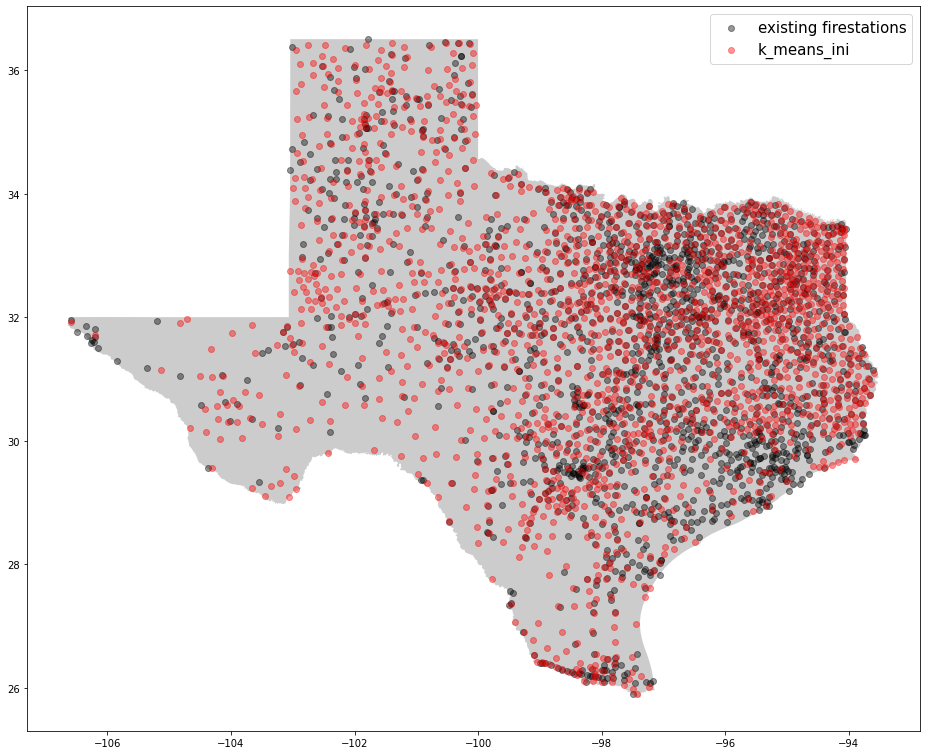

In [61]:
crs = {'init': 'epsg:4326'}
texas = gpd.read_file("Texas_State_Boundary/State.shp")
geometry = [Point(xy) for xy in zip(fs_kmeans["Longitude"],fs_kmeans["Latitude"])]
geo_df = gpd.GeoDataFrame(fs_kmeans,crs=crs,geometry = geometry)
geometry2 = [Point(xy) for xy in zip(firestations_df["Longitude"],firestations_df["Latitude"])]
geo_df2 = gpd.GeoDataFrame(firestations_df,crs=crs,geometry = geometry2)
geometry3 = [Point(xy) for xy in zip(fs_kmeans_ini["Longitude"],fs_kmeans_ini["Latitude"])]
geo_df3 = gpd.GeoDataFrame(fs_kmeans_ini,crs=crs,geometry = geometry)
fig, ax = plt.subplots(figsize = (16,16))
texas.plot(ax=ax, alpha = 0.4, color='grey')
#geo_df.plot(ax=ax,aspect=1, alpha=0.4,color="green",label="Kmeans_points")
geo_df2.plot(ax=ax,aspect=1, alpha=0.4,color="black",label="existing firestations")
geo_df3.plot(ax=ax,aspect=1, alpha=0.4,color="red",label="k_means_ini")
plt.legend(prop={'size':15},)

In [63]:
from scipy.spatial import distance
coords=[(fire_df2k2["LATITUDE"][i],fire_df2k2["LONGITUDE"][i]) for i,v in fire_df2k2.iterrows()]
coords2=[(fs_kmeans_ini["Latitude"][i],fs_kmeans_ini["Longitude"][i]) for i,v in fs_kmeans_ini.iterrows()]

DIST_kmeans_ini=distance.cdist(coords, coords2, 'euclidean')

In [65]:
DIST_kmeans_ini=DIST_kmeans_ini*111

In [66]:
min_distk2=[]
for i in range(len(DIST_kmeans_ini)):
    min_distk2.append((np.min(DIST_kmeans_ini[i]),firestations_df["FireDepartmentId"][np.where(DIST_kmeans_ini[i]==np.min(DIST_kmeans_ini[i]))[0][0]]))

In [67]:
min_distancek2=[]
closest_fsk2=[]
for i in range(len(min_distk2)):
    min_distancek2.append(min_distk2[i][0])
    closest_fsk2.append(min_distk2[i][1])

In [75]:
fire_df2k2["closest_firestation"]=closest_fsk2
fire_df2k2["closest_distance"]=min_distancek2

In [76]:
t=[]
for i in range(len(fire_df2k2)):
    t.append((0.65+0.621371*fire_df2k2["closest_distance"][i]*1.1)*60)
fire_df2k2["time_cal"]=t

In [77]:
fire_df2k2['<4_min'] = np.where(fire_df2k2['time_cal']<=240, 1, 0)
fire_df2k2['<6_min'] = np.where(fire_df2k2['time_cal']<=360, 1, 0)
fire_df2k2['<8_min'] = np.where(fire_df2k2['time_cal']<=480, 1, 0)
fire_df2k2['<10_min'] = np.where(fire_df2k2['time_cal']<=600, 1, 0)
fire_df2k2['<12_min'] = np.where(fire_df2k2['time_cal']<=720, 1, 0)
fire_df2k2['<15_min'] = np.where(fire_df2k2['time_cal']<=900, 1, 0)
fire_df2k2['<20_min'] = np.where(fire_df2k2['time_cal']<=12000, 1, 0)

In [78]:
np.sum(fire_df2k2["<8_min"])

132978

##### Weighted K-Means

In [79]:
wt_kmeans_ini = KMeans(n_clusters=1840, init= np.array(firestations_df.loc[:,['Latitude','Longitude']]),random_state=0)

In [80]:
weighted_kmeans_ini=wt_kmeans_ini.fit(X_h,sample_weight=fire_df2k3["FIRE_SIZE"])

C:\Users\ishan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [81]:
fs_wt_kmeans_ini=pd.DataFrame(wt_kmeans_ini.cluster_centers_)
fs_wt_kmeans_ini.rename(columns={"0":"Latitude","1":"Longitude"},inplace=True)
fs_wt_kmeans_ini.set_axis(["Latitude","Longitude"],axis='columns',inplace=True)

<ipython-input-81-bd51feb4bd51>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  fs_wt_kmeans_ini.set_axis(["Latitude","Longitude"],axis='columns',inplace=True)


C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

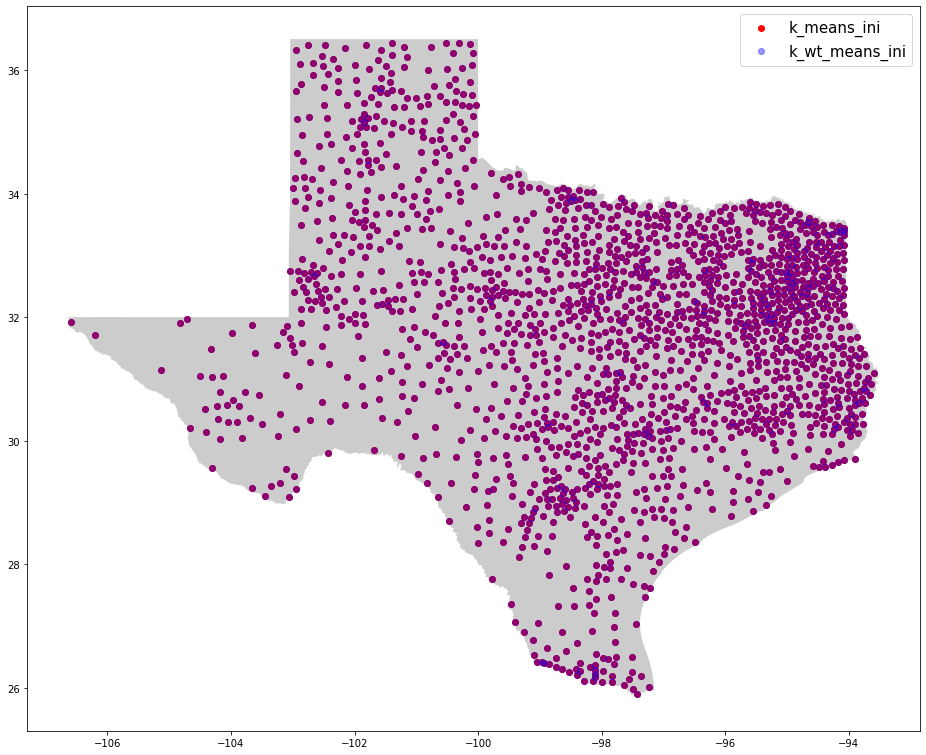

In [82]:
crs = {'init': 'epsg:4326'}
texas = gpd.read_file("Texas_State_Boundary/State.shp")
geometry = [Point(xy) for xy in zip(fs_kmeans["Longitude"],fs_kmeans["Latitude"])]
geo_df = gpd.GeoDataFrame(fs_kmeans,crs=crs,geometry = geometry)
geometry2 = [Point(xy) for xy in zip(firestations_df["Longitude"],firestations_df["Latitude"])]
geo_df2 = gpd.GeoDataFrame(firestations_df,crs=crs,geometry = geometry2)
geometry3 = [Point(xy) for xy in zip(fs_kmeans_ini["Longitude"],fs_kmeans_ini["Latitude"])]
geo_df3 = gpd.GeoDataFrame(fs_kmeans_ini,crs=crs,geometry = geometry)
geometry4 = [Point(xy) for xy in zip(fs_wt_kmeans_ini["Longitude"],fs_wt_kmeans_ini["Latitude"])]
geo_df4 = gpd.GeoDataFrame(fs_wt_kmeans_ini,crs=crs,geometry = geometry)
fig, ax = plt.subplots(figsize = (16,16))
texas.plot(ax=ax, alpha = 0.4, color='grey')
#geo_df.plot(ax=ax,aspect=1, alpha=0.4,color="green",label="Kmeans_points")
#geo_df2.plot(ax=ax,aspect=1, alpha=0.4,color="black",label="existing firestations")
geo_df3.plot(ax=ax,aspect=1, alpha=1,color="red",label="k_means_ini")
geo_df4.plot(ax=ax,aspect=1, alpha=0.4,color="blue",label="k_wt_means_ini")
plt.legend(prop={'size':15},)

In [83]:
from scipy.spatial import distance
coords=[(fire_df2k3["LATITUDE"][i],fire_df2k3["LONGITUDE"][i]) for i,v in fire_df2k3.iterrows()]
coords2=[(fs_wt_kmeans_ini["Latitude"][i],fs_wt_kmeans_ini["Longitude"][i]) for i,v in fs_wt_kmeans_ini.iterrows()]

DIST_kmeans_wt=distance.cdist(coords, coords2, 'euclidean')

In [87]:
DIST_kmeans_wt=(DIST_kmeans_wt)*111

In [88]:
min_distk3=[]
for i in range(len(DIST_kmeans_wt)):
    min_distk3.append((np.min(DIST_kmeans_wt[i]),firestations_df["FireDepartmentId"][np.where(DIST_kmeans_wt[i]==np.min(DIST_kmeans_wt[i]))[0][0]]))

In [89]:
min_distancek3=[]
closest_fsk3=[]
for i in range(len(min_distk3)):
    min_distancek3.append(min_distk3[i][0])
    closest_fsk3.append(min_distk3[i][1])

In [90]:
fire_df2k3["closest_firestation"]=closest_fsk3
fire_df2k3["closest_distance"]=min_distancek3

In [91]:
t=[]
for i in range(len(fire_df2k3)):
    t.append((0.65+0.621371*fire_df2k3["closest_distance"][i]*1.1)*60)
fire_df2k3["time_cal"]=t

In [92]:
fire_df2k3['<4_min'] = np.where(fire_df2k3['time_cal']<=240, 1, 0)
fire_df2k3['<6_min'] = np.where(fire_df2k3['time_cal']<=360, 1, 0)
fire_df2k3['<8_min'] = np.where(fire_df2k3['time_cal']<=480, 1, 0)
fire_df2k3['<10_min'] = np.where(fire_df2k3['time_cal']<=600, 1, 0)
fire_df2k3['<12_min'] = np.where(fire_df2k3['time_cal']<=720, 1, 0)
fire_df2k3['<15_min'] = np.where(fire_df2k3['time_cal']<=900, 1, 0)
fire_df2k3['<20_min'] = np.where(fire_df2k3['time_cal']<=12000, 1, 0)

In [93]:
np.sum(fire_df2k3["<8_min"])

125651

#### Weighted K-means without initialization

In [96]:
fire_df2k4=fire_df2k3.copy(deep=True)

In [97]:
wt_kmeans = KMeans(n_clusters=1840,random_state=0)

In [155]:
weighted_kmeans_ini=wt_kmeans.fit(X_h,sample_weight=fire_df2k4["FIRE_SIZE"])

In [156]:
fs_wt_kmeans=pd.DataFrame(wt_kmeans.cluster_centers_)
fs_wt_kmeans.rename(columns={"0":"Latitude","1":"Longitude"},inplace=True)
fs_wt_kmeans.set_axis(["Latitude","Longitude"],axis='columns',inplace=True)

<ipython-input-156-1f38122f0522>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  fs_wt_kmeans.set_axis(["Latitude","Longitude"],axis='columns',inplace=True)


C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

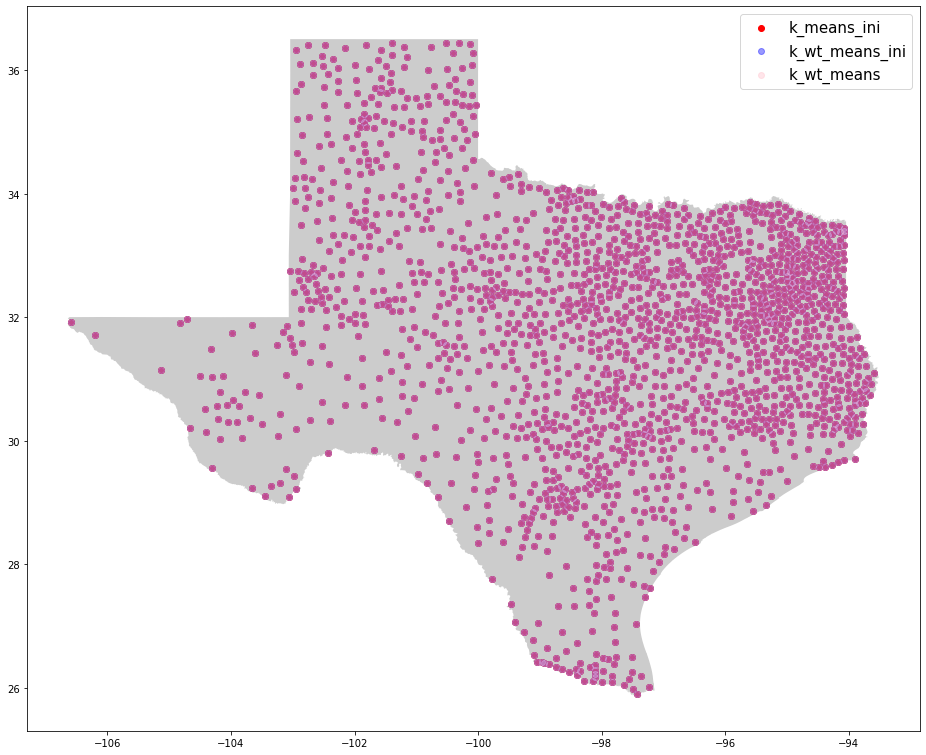

In [157]:
crs = {'init': 'epsg:4326'}
texas = gpd.read_file("Texas_State_Boundary/State.shp")
geometry = [Point(xy) for xy in zip(fs_kmeans["Longitude"],fs_kmeans["Latitude"])]
geo_df = gpd.GeoDataFrame(fs_kmeans,crs=crs,geometry = geometry)
geometry2 = [Point(xy) for xy in zip(firestations_df["Longitude"],firestations_df["Latitude"])]
geo_df2 = gpd.GeoDataFrame(firestations_df,crs=crs,geometry = geometry2)
geometry3 = [Point(xy) for xy in zip(fs_kmeans_ini["Longitude"],fs_kmeans_ini["Latitude"])]
geo_df3 = gpd.GeoDataFrame(fs_kmeans_ini,crs=crs,geometry = geometry)
geometry4 = [Point(xy) for xy in zip(fs_wt_kmeans_ini["Longitude"],fs_wt_kmeans_ini["Latitude"])]
geo_df4 = gpd.GeoDataFrame(fs_wt_kmeans_ini,crs=crs,geometry = geometry)
geometry5 = [Point(xy) for xy in zip(fs_wt_kmeans["Longitude"],fs_wt_kmeans["Latitude"])]
geo_df5 = gpd.GeoDataFrame(fs_wt_kmeans,crs=crs,geometry = geometry)
fig, ax = plt.subplots(figsize = (16,16))
texas.plot(ax=ax, alpha = 0.4, color='grey')
#geo_df.plot(ax=ax,aspect=1, alpha=0.4,color="green",label="Kmeans_points")
#geo_df2.plot(ax=ax,aspect=1, alpha=0.4,color="black",label="existing firestations")
geo_df3.plot(ax=ax,aspect=1, alpha=1,color="red",label="k_means_ini")
geo_df4.plot(ax=ax,aspect=1, alpha=0.4,color="blue",label="k_wt_means_ini")
geo_df5.plot(ax=ax,aspect=1, alpha=0.4,color="pink",label="k_wt_means")

plt.legend(prop={'size':15},)

In [158]:
from scipy.spatial import distance
coords=[(fire_df2k4["LATITUDE"][i],fire_df2k4["LONGITUDE"][i]) for i,v in fire_df2k4.iterrows()]
coords2=[(fs_wt_kmeans["Latitude"][i],fs_wt_kmeans["Longitude"][i]) for i,v in fs_wt_kmeans.iterrows()]

DIST_kmeans_wt=distance.cdist(coords, coords2, 'euclidean')

In [159]:
DIST_kmeans_wt=(DIST_kmeans_wt)*111

In [160]:
min_distk4=[]
for i in range(len(DIST_kmeans_wt)):
    min_distk4.append((np.min(DIST_kmeans_wt[i]),firestations_df["FireDepartmentId"][np.where(DIST_kmeans_wt[i]==np.min(DIST_kmeans_wt[i]))[0][0]]))

In [161]:
min_distancek4=[]
closest_fsk4=[]
for i in range(len(min_distk4)):
    min_distancek4.append(min_distk4[i][0])
    closest_fsk4.append(min_distk4[i][1])

In [162]:
fire_df2k4["closest_firestation"]=closest_fsk4
fire_df2k4["closest_distance"]=min_distancek4

In [163]:
t=[]
for i in range(len(fire_df2k4)):
    t.append((0.65+0.621371*fire_df2k4["closest_distance"][i]*1.1)*60)
fire_df2k4["time_cal"]=t

In [164]:
fire_df2k4['<4_min'] = np.where(fire_df2k4['time_cal']<=240, 1, 0)
fire_df2k4['<6_min'] = np.where(fire_df2k4['time_cal']<=360, 1, 0)
fire_df2k4['<8_min'] = np.where(fire_df2k4['time_cal']<=480, 1, 0)
fire_df2k4['<10_min'] = np.where(fire_df2k4['time_cal']<=600, 1, 0)
fire_df2k4['<12_min'] = np.where(fire_df2k4['time_cal']<=720, 1, 0)
fire_df2k4['<15_min'] = np.where(fire_df2k4['time_cal']<=900, 1, 0)
fire_df2k4['<20_min'] = np.where(fire_df2k4['time_cal']<=12000, 1, 0)

In [165]:
np.sum(fire_df2k4["<8_min"])

132391

### CLUSTERING FOR NEW FIRESTATIONS BASED ON KMEANS ALGORITHM

In [166]:
### Applying Kmeans algorithm on the dataset by consoidering the miss stations from original firestation.
# ideally 6 min limit,for fire_size C,D,E,F,G

In [416]:
df_missed = fire_df2[fire_df2["<10_min"]==0]

In [417]:
df_missed_ab=df_missed[df_missed["FIRE_SIZE_CLASS"]!="A"]
df_missed_ab=df_missed_ab[df_missed_ab["FIRE_SIZE_CLASS"]!="B"]

In [418]:
df_missed_ab["FIRE_SIZE_CLASS"].value_counts()

C    3086
D     922
E     611
F     378
G     142
Name: FIRE_SIZE_CLASS, dtype: int64

In [419]:
# as we can see from graph not much benefit because its almost spread in entire usa

In [420]:
df_missed_ab

,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,...,closest_firestation,closest_distance,time_cal,<4_min,<6_min,<8_min,<10_min,<12_min,<15_min,<20_min
16,5219,5244,2005,2453624.5,254,1300.0,1.0,Lightning,2453624.5,254.0,...,862,26.849856,1140.125629,0,0,0,0,0,0,1
63,5760,5787,2005,2453669.5,299,1105.0,7.0,Arson,2453670.5,300.0,...,1911,14.465767,632.248136,0,0,0,0,1,1,1
74,6467,6497,2005,2453731.5,361,1030.0,9.0,Miscellaneous,2453731.5,361.0,...,265,24.632759,1049.201426,0,0,0,0,0,0,1
102,7030,7063,2006,2453739.5,4,1130.0,7.0,Arson,2453739.5,4.0,...,798,16.248508,705.359223,0,0,0,0,1,1,1
114,7327,7364,2006,2453796.5,61,1500.0,7.0,Arson,2453797.5,62.0,...,798,15.304747,666.655122,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141376,1852011,300284059,2015,2457224.5,202,NaN,9.0,Miscellaneous,NaN,NaN,...,1473,21.943585,938.917067,0,0,0,0,0,0,1
141432,1852074,300284191,2015,2457110.5,88,NaN,9.0,Miscellaneous,NaN,NaN,...,1506,15.167055,661.008289,0,0,0,0,1,1,1
141438,1852080,300284199,2015,2457329.5,307,NaN,9.0,Miscellaneous,NaN,NaN,...,1800,20.065570,861.898797,0,0,0,0,0,1,1
141919,1852669,300285634,2015,2457219.5,197,NaN,9.0,Miscellaneous,NaN,NaN,...,1403,14.707784,642.173366,0,0,0,0,1,1,1


C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


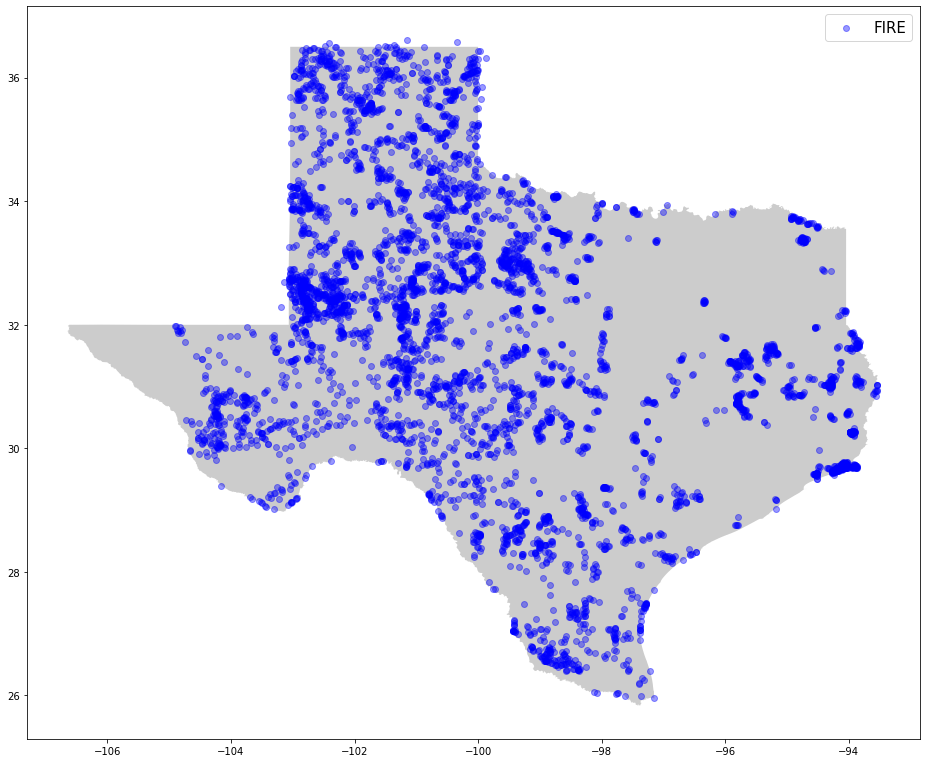

In [421]:
crs = {'init': 'epsg:4326'}
texas = gpd.read_file("Texas_State_Boundary/State.shp")
geometry4 = [Point(xy) for xy in zip(df_missed_ab["LONGITUDE"],df_missed_ab["LATITUDE"])]
geo_df4 = gpd.GeoDataFrame(df_missed_ab,crs=crs,geometry = geometry4)
fig, ax = plt.subplots(figsize = (16,16))
texas.plot(ax=ax, alpha = 0.4, color='grey')
#geo_df.plot(ax=ax,aspect=1, alpha=0.4,color="green",label="Kmeans_points")
#geo_df2.plot(ax=ax,aspect=1, alpha=0.4,color="black",label="existing firestations")
#geo_df3.plot(ax=ax,aspect=1, alpha=1,color="red",label="k_means_ini")
geo_df4.plot(ax=ax,aspect=1, alpha=0.4,color="blue",label="FIRE")
plt.legend(prop={'size':15},)

In [422]:
X=df_missed_ab.loc[:,['LATITUDE','LONGITUDE']]
len(X)

5139

In [423]:
wt_kmeans = KMeans(n_clusters=100,random_state=0,init="k-means++")

In [424]:
weighted_kmeans_6=wt_kmeans.fit(X,sample_weight=df_missed_ab["FIRE_SIZE"])

In [425]:
fs_wt_kmeans8=pd.DataFrame(wt_kmeans.cluster_centers_)
fs_wt_kmeans8.rename(columns={"0":"Latitude","1":"Longitude"},inplace=True)
fs_wt_kmeans8.set_axis(["Latitude","Longitude"],axis='columns',inplace=True)

<ipython-input-425-0f3a650d012f>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  fs_wt_kmeans8.set_axis(["Latitude","Longitude"],axis='columns',inplace=True)


In [426]:
len(fs_wt_kmeans8)

100

C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


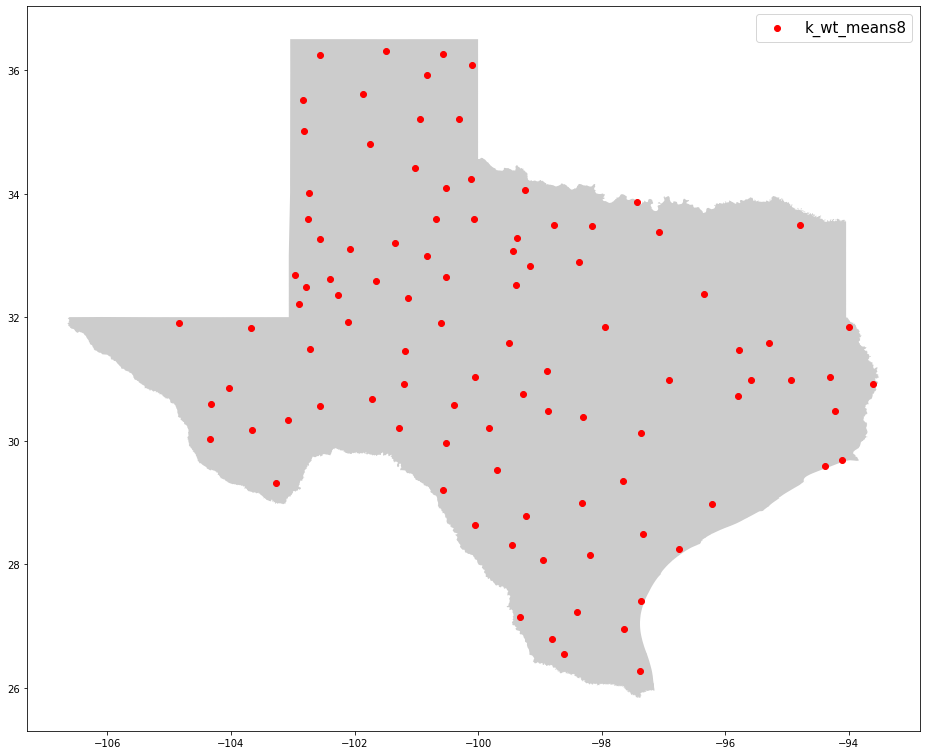

In [427]:
crs = {'init': 'epsg:4326'}
texas = gpd.read_file("Texas_State_Boundary/State.shp")
geometry6 = [Point(xy) for xy in zip(fs_wt_kmeans8["Longitude"],fs_wt_kmeans8["Latitude"])]
geo_df6 = gpd.GeoDataFrame(fs_wt_kmeans8,crs=crs,geometry = geometry6)
fig, ax = plt.subplots(figsize = (16,16))
texas.plot(ax=ax, alpha = 0.4, color='grey')
#geo_df.plot(ax=ax,aspect=1, alpha=0.4,color="green",label="Kmeans_points")
#geo_df2.plot(ax=ax,aspect=1, alpha=0.4,color="black",label="existing firestations")
#geo_df3.plot(ax=ax,aspect=1, alpha=1,color="red",label="k_means_ini")
#geo_df4.plot(ax=ax,aspect=1, alpha=0.4,color="blue",label="k_wt_means_ini")
#geo_df5.plot(ax=ax,aspect=1, alpha=0.4,color="pink",label="k_wt_means")
geo_df6.plot(ax=ax,aspect=1, alpha=1,color="red",label="k_wt_means8")
plt.legend(prop={'size':15},)

In [428]:
from scipy.spatial import distance
coords=[(df_missed_ab["LATITUDE"][i],df_missed_ab["LONGITUDE"][i]) for i,v in df_missed_ab.iterrows()]
coords2=[(fs_wt_kmeans8["Latitude"][i],fs_wt_kmeans8["Longitude"][i]) for i,v in fs_wt_kmeans8.iterrows()]

DIST_kmeans_wt=distance.cdist(coords, coords2, 'euclidean')

In [429]:
len(DIST_kmeans_wt[0])

100

In [430]:
DIST_kmeans_wt=(DIST_kmeans_wt)*111

In [431]:
min_dist8=[]
for i in range(len(DIST_kmeans_wt)):
    min_dist8.append((np.min(DIST_kmeans_wt[i]),firestations_df["FireDepartmentId"][np.where(DIST_kmeans_wt[i]==np.min(DIST_kmeans_wt[i]))[0][0]]))

In [432]:
min_distance8=[]
closest_fs8=[]
for i in range(len(min_dist8)):
    min_distance8.append(min_dist8[i][0])
    closest_fs8.append(min_dist8[i][1])

In [433]:
len(closest_fs8)

5139

In [434]:
df_missed_ab["closest_firestation"]=closest_fs8
df_missed_ab["closest_distance"]=min_distance8

In [435]:
len(df_missed_ab["closest_distance"])

5139

In [436]:
t=[]
for i,v in df_missed_ab.iterrows():
    t.append((0.65+0.621371*df_missed_ab["closest_distance"][i]*1.1)*60)


In [437]:
df_missed_ab["time_cal"]=t

In [438]:
df_missed_ab['<4_min'] = np.where(df_missed_ab['time_cal']<=240, 1, 0)
df_missed_ab['<6_min'] = np.where(df_missed_ab['time_cal']<=360, 1, 0)
df_missed_ab['<8_min'] = np.where(df_missed_ab['time_cal']<=480, 1, 0)
df_missed_ab['<10_min'] = np.where(df_missed_ab['time_cal']<=600, 1, 0)
df_missed_ab['<12_min'] = np.where(df_missed_ab['time_cal']<=720, 1, 0)
df_missed_ab['<15_min'] = np.where(df_missed_ab['time_cal']<=900, 1, 0)
df_missed_ab['<20_min'] = np.where(df_missed_ab['time_cal']<=12000, 1, 0)